# Resale flat prices based on registration date

The data-set is from the years 2017 to 2024. We will identify features that affect prices of resale flat. We will create a seperate CSV file with the URA planning region and do a left merge with pandas.

### Load the necessary libs

In [2]:
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Load the data 

In [3]:
data = np.genfromtxt('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv',
                    skip_header=1,
                    dtype=[('month', 'U10'), ('town', 'U50'), ('flat_type', 'U50'), ('block', 'U8'),
                           ('street_name', 'U50'), ('floor', 'U50'), ('area', 'f8'), ('model', 'U50'),
                           ('lc_year', 'i4'), ('remaining', 'U50'), ('price', 'f8')],
                    delimiter=",")

### Check the data and the head of the data

In [4]:
print(data)

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12',  44., 'Improved', 1979, '61 years 04 months',  232000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03',  67., 'New Generation', 1978, '60 years 07 months',  250000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03',  67., 'New Generation', 1980, '62 years 05 months',  262000.)
 ...
 ('2024-06', 'YISHUN', 'EXECUTIVE', '723', 'YISHUN ST 71', '10 TO 12', 146., 'Maisonette', 1986, '61 years',  790000.)
 ('2024-06', 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '10 TO 12', 146., 'Maisonette', 1988, '62 years 08 months', 1000000.)
 ('2024-06', 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '04 TO 06', 146., 'Maisonette', 1988, '62 years 08 months', 1000000.)]


In [5]:
print(data[:10])

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '150', 'ANG MO KIO AVE 5', '01 TO 03', 68., 'New Generation', 1981, '63 years', 275000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '447', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1979, '61 years 06 months', 280000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '218', 'ANG MO KIO AVE 1'

### Feature engineering we will use date time to create a year column out of the month column

In [6]:
# Extract year using vectorized approach
years = np.vectorize(lambda x: datetime.datetime.strptime(x, "%Y-%m").year)(data['month'])

# Create a new structured array with the year column
new_data = np.core.records.fromarrays([data['month'], years, data['town'], data['flat_type'], data['block'],
                                       data['street_name'], data['floor'], data['area'],
                                       data['model'], data['lc_year'], data['remaining'], data['price']],
                                      names=('month', 'year', 'town', 'flat_type', 'block',
                                             'street_name', 'floor', 'area', 'model', 'lc_year',
                                             'remaining', 'price'))

# Assign the new data array back to data

# Print the data with the new year column
print(data)

[('2017-01', 2017, 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12',  44., 'Improved', 1979, '61 years 04 months',  232000.)
 ('2017-01', 2017, 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03',  67., 'New Generation', 1978, '60 years 07 months',  250000.)
 ('2017-01', 2017, 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03',  67., 'New Generation', 1980, '62 years 05 months',  262000.)
 ...
 ('2024-06', 2024, 'YISHUN', 'EXECUTIVE', '723', 'YISHUN ST 71', '10 TO 12', 146., 'Maisonette', 1986, '61 years',  790000.)
 ('2024-06', 2024, 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '10 TO 12', 146., 'Maisonette', 1988, '62 years 08 months', 1000000.)
 ('2024-06', 2024, 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '04 TO 06', 146., 'Maisonette', 1988, '62 years 08 months', 1000000.)]


In [7]:
# Drop the month column using slicing
data = data[['year', 'town', 'flat_type', 'block', 'street_name', 'floor', 'area',
             'model', 'lc_year', 'remaining', 'price']]

# Print the data with the dropped month column
print(data[:10])

[(2017, 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000.)
 (2017, 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000.)
 (2017, 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000.)
 (2017, 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000.)
 (2017, 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000.)
 (2017, 'ANG MO KIO', '3 ROOM', '150', 'ANG MO KIO AVE 5', '01 TO 03', 68., 'New Generation', 1981, '63 years', 275000.)
 (2017, 'ANG MO KIO', '3 ROOM', '447', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1979, '61 years 06 months', 280000.)
 (2017, 'ANG MO KIO', '3 ROOM', '218', 'ANG MO KIO AVE 1', '04 TO 06', 67., 'New Generation', 197

In [8]:
towns = np.unique(data['town'])
print('Towns include:')
print(towns)

Towns include:
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


### Create a csv file out of the town column

In [15]:
# Used once to write towns into CSV
#towns_column = towns.reshape(-1, 1)
#np.savetxt('towns.csv', towns_column, delimiter=',', fmt='%s')

### Import Pandas and perform a left join with the towns.csv

In [9]:
# Perform a left join on the HDB dataset with a .csv that I created myself which has the URA planning region
import pandas as pd

df1 = pd.DataFrame(data)
df2 = pd.read_csv('towns.csv')

# Perform left join
merged_df = pd.merge(df1, df2, on='town', how='left')

In [10]:
merged_df

,year,town,flat_type,block,street_name,floor,area,model,lc_year,remaining,price,region
0,2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,northeast
1,2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,northeast
2,2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,northeast
3,2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,northeast
4,2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,northeast
...,...,...,...,...,...,...,...,...,...,...,...,...
182228,2024,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,63 years 03 months,800000.0,north
182229,2024,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,63 years 01 month,850000.0,north
182230,2024,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,61 years,790000.0,north
182231,2024,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years 08 months,1000000.0,north


In [11]:
merged_df.corr()

,year,area,lc_year,price
year,1.000000,-0.035019,0.130276,0.314454
area,-0.035019,1.000000,0.114207,0.599096
lc_year,0.130276,0.114207,1.000000,0.365723
price,0.314454,0.599096,0.365723,1.000000


### Export the new dataframe as a csv and reimport 

In [12]:
# Define the filename 
filename = 'merged.csv'

# Save the DataFrame to a CSV file
merged_df.to_csv(filename, index=False)

In [13]:
data = np.genfromtxt('merged.csv',
                    skip_header=1,
                    dtype = [('year', 'i4'), ('town', 'U50'), ('flat_type', 'U10'), ('block', 'U10'),
                             ('street_name', 'U50'), ('floor', 'U50'), ('area', 'f8'), ('model', 'U50'), ('lc_year', 'i4'),
                             ('remaining', 'U50'), ('price', 'f8'), ('region', 'U50')],
                    delimiter=",")

### Check the data 

In [14]:
print(data)

[(2017, 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12',  44., 'Improved', 1979, '61 years 04 months',  232000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03',  67., 'New Generation', 1978, '60 years 07 months',  250000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03',  67., 'New Generation', 1980, '62 years 05 months',  262000., 'northeast')
 ...
 (2024, 'YISHUN', 'EXECUTIVE', '723', 'YISHUN ST 71', '10 TO 12', 146., 'Maisonette', 1986, '61 years',  790000., 'north')
 (2024, 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '10 TO 12', 146., 'Maisonette', 1988, '62 years 08 months', 1000000., 'north')
 (2024, 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '04 TO 06', 146., 'Maisonette', 1988, '62 years 08 months', 1000000., 'north')]


In [15]:
print(data[:10])

[(2017, 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '150', 'ANG MO KIO AVE 5', '01 TO 03', 68., 'New Generation', 1981, '63 years', 275000., 'northeast')
 (2017, 'ANG MO KIO', '3 ROOM', '447', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1979, '61 years 06 months', 280000., 'northeast')
 (2017

In [16]:
set_year = set(data['year'])
set_flat = set(data['flat_type'])
print(str(len(set_year)) + " unique values in year column")
print(str(len(set_flat )) + " unique values in flat column")
print(set_year)
print(set_flat)

8 unique values in year column
7 unique values in flat column
{2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024}
{'2 ROOM', '4 ROOM', 'MULTI-GENE', '1 ROOM', '3 ROOM', 'EXECUTIVE', '5 ROOM'}


### Basic stats

In [17]:
max_value = np.max(data['price'])
min_value = np.min(data['price'] )           
max_row_index = np.argmax(data['price'])
min_row_index = np.argmin(data['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(data[max_row_index][0],data[max_row_index][10],data[max_row_index][2],data[max_row_index][11],data[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(data[min_row_index][0],data[min_row_index][10],data[min_row_index][2],data[min_row_index][11],data[min_row_index][1]))

The maximum price in the year 2024 at $ 1588000.0 for type 5 ROOM in central region, BUKIT MERAH town. 
The minimum price in the year 2020 at $ 140000.0 for type 3 ROOM in central region, TOA PAYOH town. 


### Box Plot By Region

Number of regions: 5
Number of value sets: 5


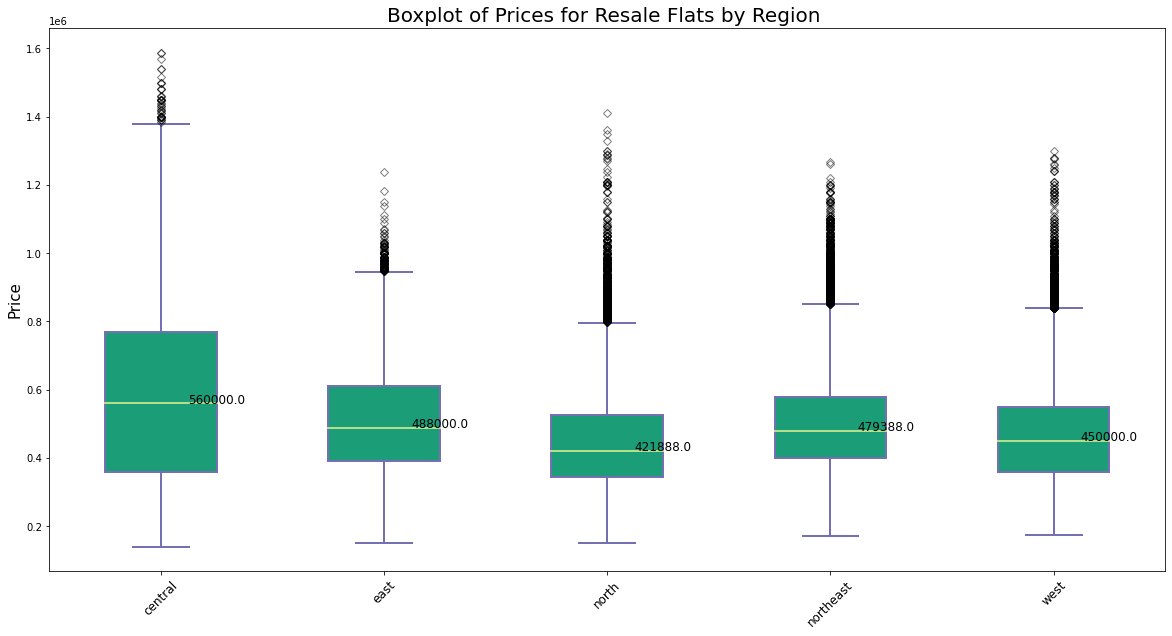

In [33]:
# Filter out rows with null 'price'
nonnull_values = data[~np.isnan(data['price'])]

# Get the unique regions
regions = np.unique(nonnull_values['region'])

# Prepare data for box plot
values_combined = [nonnull_values['price'][nonnull_values['region'] == region] for region in regions]

# Check the lengths of values_combined and regions
print(f'Number of regions: {len(regions)}')
print(f'Number of value sets: {len(values_combined)}')

# Plotting
plt.figure(figsize=(20, 10))
plt.title('Boxplot of Prices for Resale Flats by Region ', fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)

# Create box plot
bp_dict = plt.boxplot(values_combined, labels=regions, patch_artist=True)

# Change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor='#1b9e77')

# Change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

# Change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Overlay median values on the plot
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y, '%.1f' % y, horizontalalignment='center', fontsize=12)

plt.show()

### Filter Out 2020 and 2024

In [50]:
# Filter data for 2020
data_2020 = (data['year'] == 2020)
data_2020_final = data[data_2020]


# Filter data for 2024
data_2024 = (data['year'] == 2024)
data_2024_final = data[data_2024]


### Box plot by regions 2020

Number of regions: 5
Number of value sets: 5


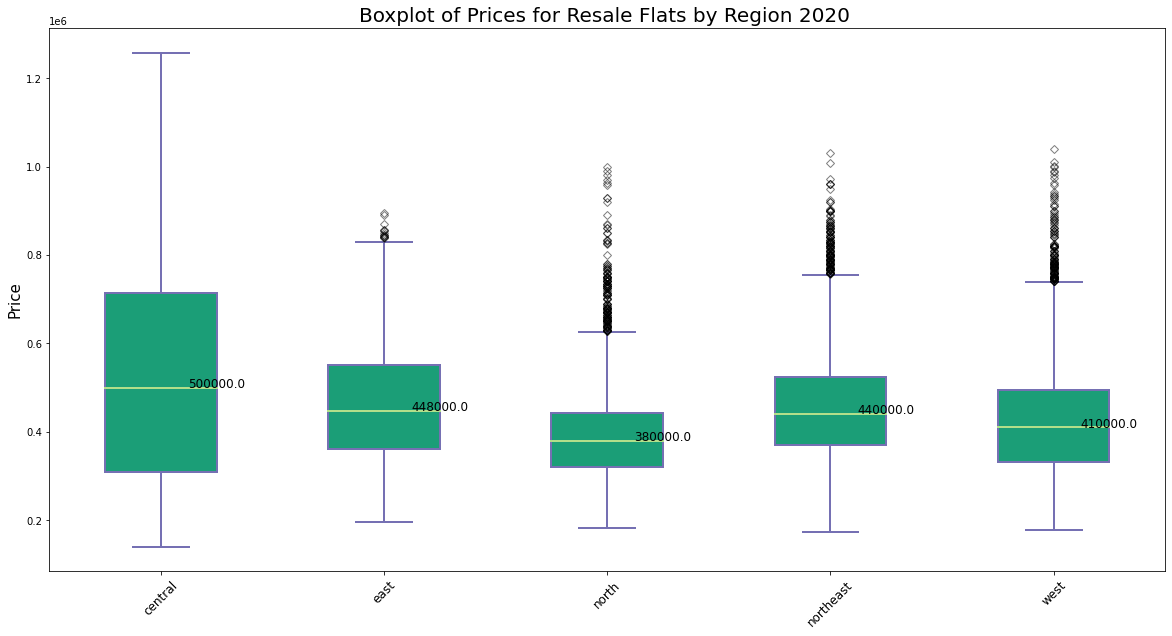

In [51]:
# Filter out rows with null 'price'
nonnull_values = data_2020_final[~np.isnan(data_2020_final['price'])]

# Get the unique regions
regions = np.unique(nonnull_values['region'])

# Prepare data for box plot
values_combined = [nonnull_values['price'][nonnull_values['region'] == region] for region in regions]

# Check the lengths of values_combined and regions
print(f'Number of regions: {len(regions)}')
print(f'Number of value sets: {len(values_combined)}')

# Plotting
plt.figure(figsize=(20, 10))
plt.title('Boxplot of Prices for Resale Flats by Region 2020 ', fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)

# Create box plot
bp_dict = plt.boxplot(values_combined, labels=regions, patch_artist=True)

# Change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor='#1b9e77')

# Change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

# Change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Overlay median values on the plot
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y, '%.1f' % y, horizontalalignment='center', fontsize=12)

plt.show()

### Boxplot for 2024 by regions

Number of regions: 5
Number of value sets: 5


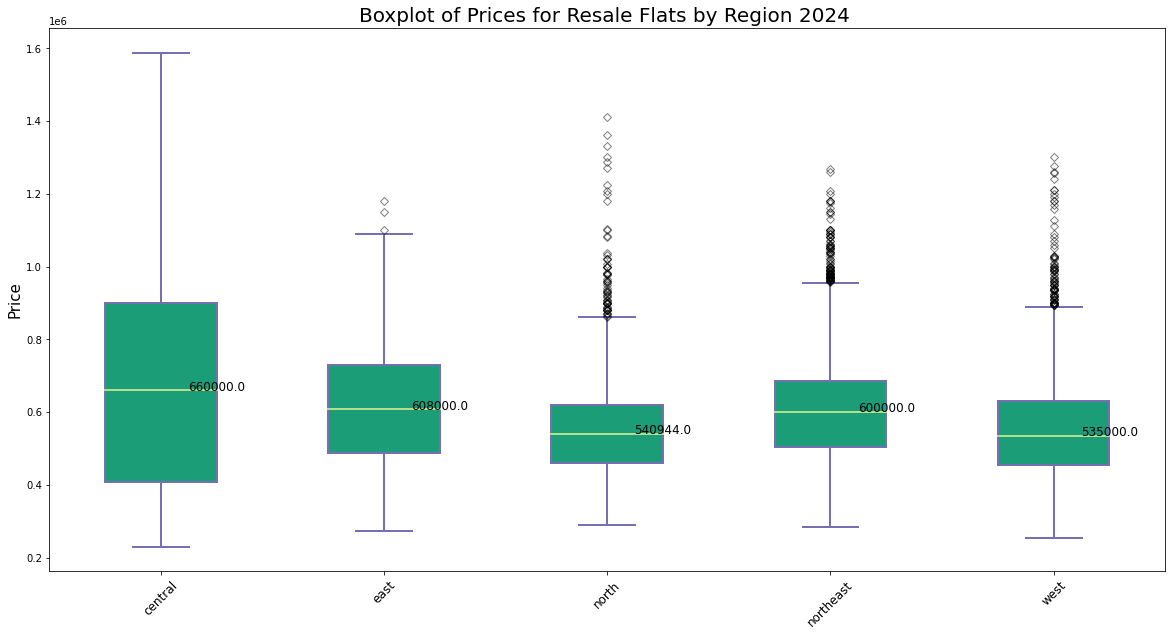

In [52]:
# Filter out rows with null 'price'
nonnull_values = data_2024_final[~np.isnan(data_2024_final['price'])]

# Get the unique regions
regions = np.unique(nonnull_values['region'])

# Prepare data for box plot
values_combined = [nonnull_values['price'][nonnull_values['region'] == region] for region in regions]

# Check the lengths of values_combined and regions
print(f'Number of regions: {len(regions)}')
print(f'Number of value sets: {len(values_combined)}')

# Plotting
plt.figure(figsize=(20, 10))
plt.title('Boxplot of Prices for Resale Flats by Region 2024 ', fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)

# Create box plot
bp_dict = plt.boxplot(values_combined, labels=regions, patch_artist=True)

# Change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor='#1b9e77')

# Change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

# Change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

# Overlay median values on the plot
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y, '%.1f' % y, horizontalalignment='center', fontsize=12)

plt.show()

Number of labels: 15
Number of value sets: 15


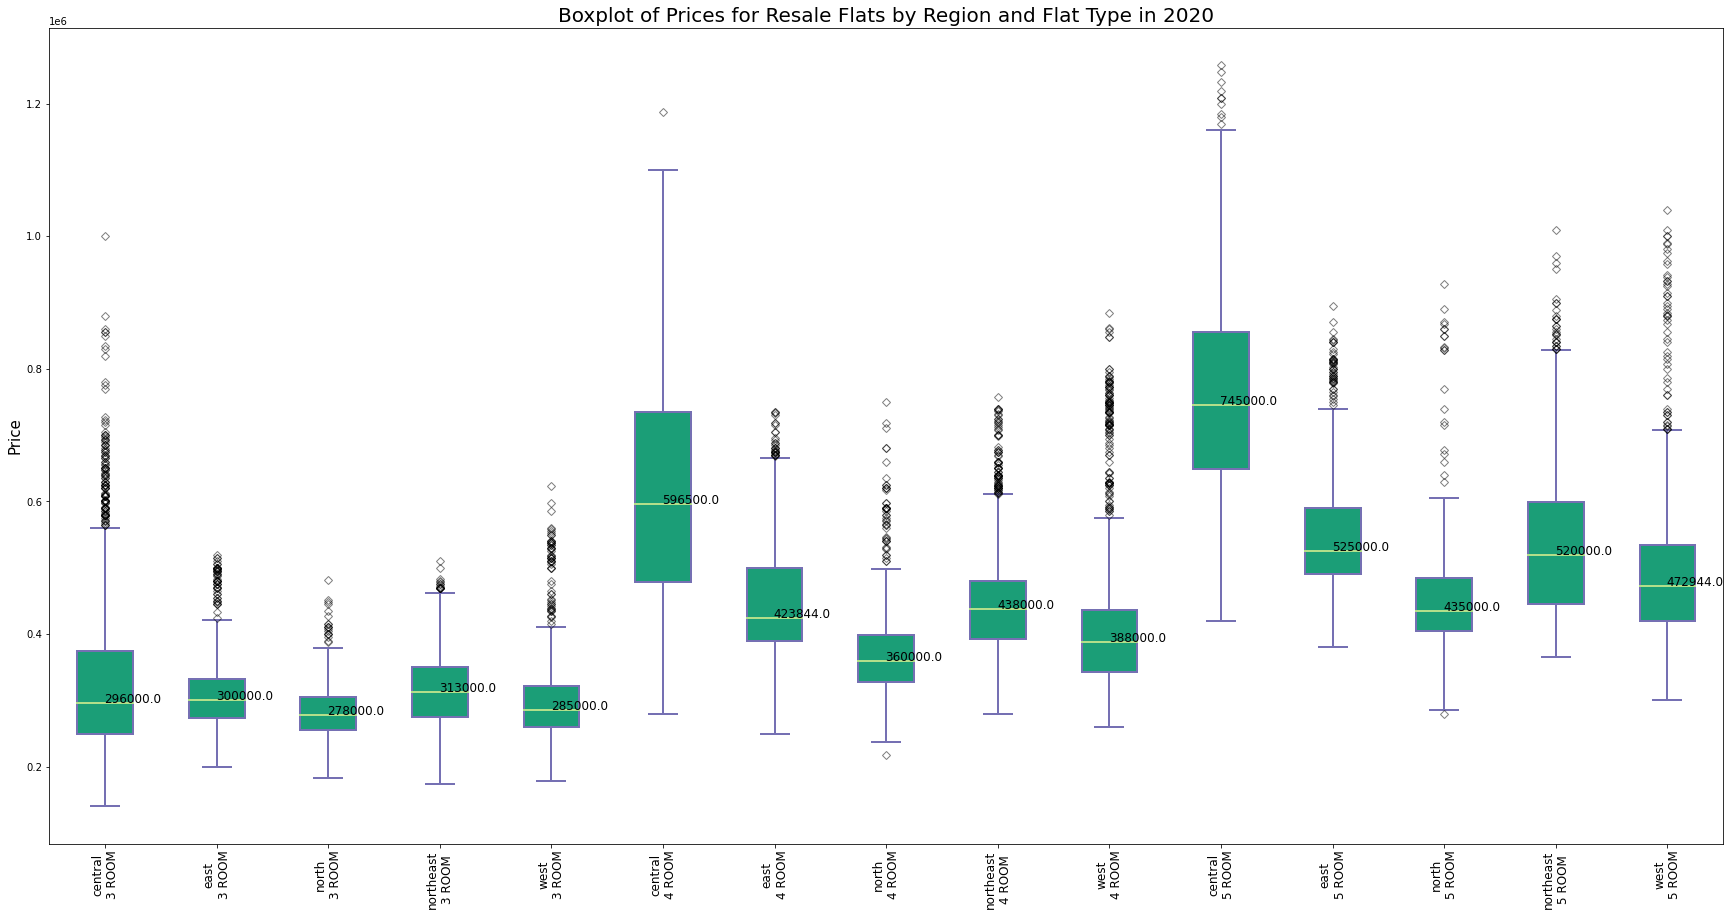

In [57]:
# Filter the data for specific flat types
data_2020_final = data_2020_final[np.isin(data_2020_final['flat_type'], ['3 ROOM', '4 ROOM', '5 ROOM'])]

# Get unique regions and flat types
regions = np.unique(data_2020_final['region'])
flat_types = np.unique(data_2020_final['flat_type'])

# Prepare data for box plot
values_combined = []
labels_combined = []

for flat_type in flat_types:
    for region in regions:
        region_flat_type_prices = data_2020_final[
            (data_2020_final['region'] == region) & (data_2020_final['flat_type'] == flat_type)
        ]['price']
        if len(region_flat_type_prices) > 0:  # Only add if there are prices available
            values_combined.append(region_flat_type_prices)
            labels_combined.append(f'{region}\n{flat_type}')

# Check the lengths of values_combined and labels_combined
print(f'Number of labels: {len(labels_combined)}')
print(f'Number of value sets: {len(values_combined)}')

# Plotting
plt.figure(figsize=(30, 15))
plt.title('Boxplot of Prices for Resale Flats by Region and Flat Type in 2020', fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=90)

# Create box plot
bp_dict = plt.boxplot(values_combined, labels=labels_combined, patch_artist=True)

# Change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor='#1b9e77')

# Change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

# Change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)
    
# Overlay median values on the plot
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y, '%.1f' % y, horizontalalignment='center', fontsize=12)

plt.show()

Number of labels: 15
Number of value sets: 15


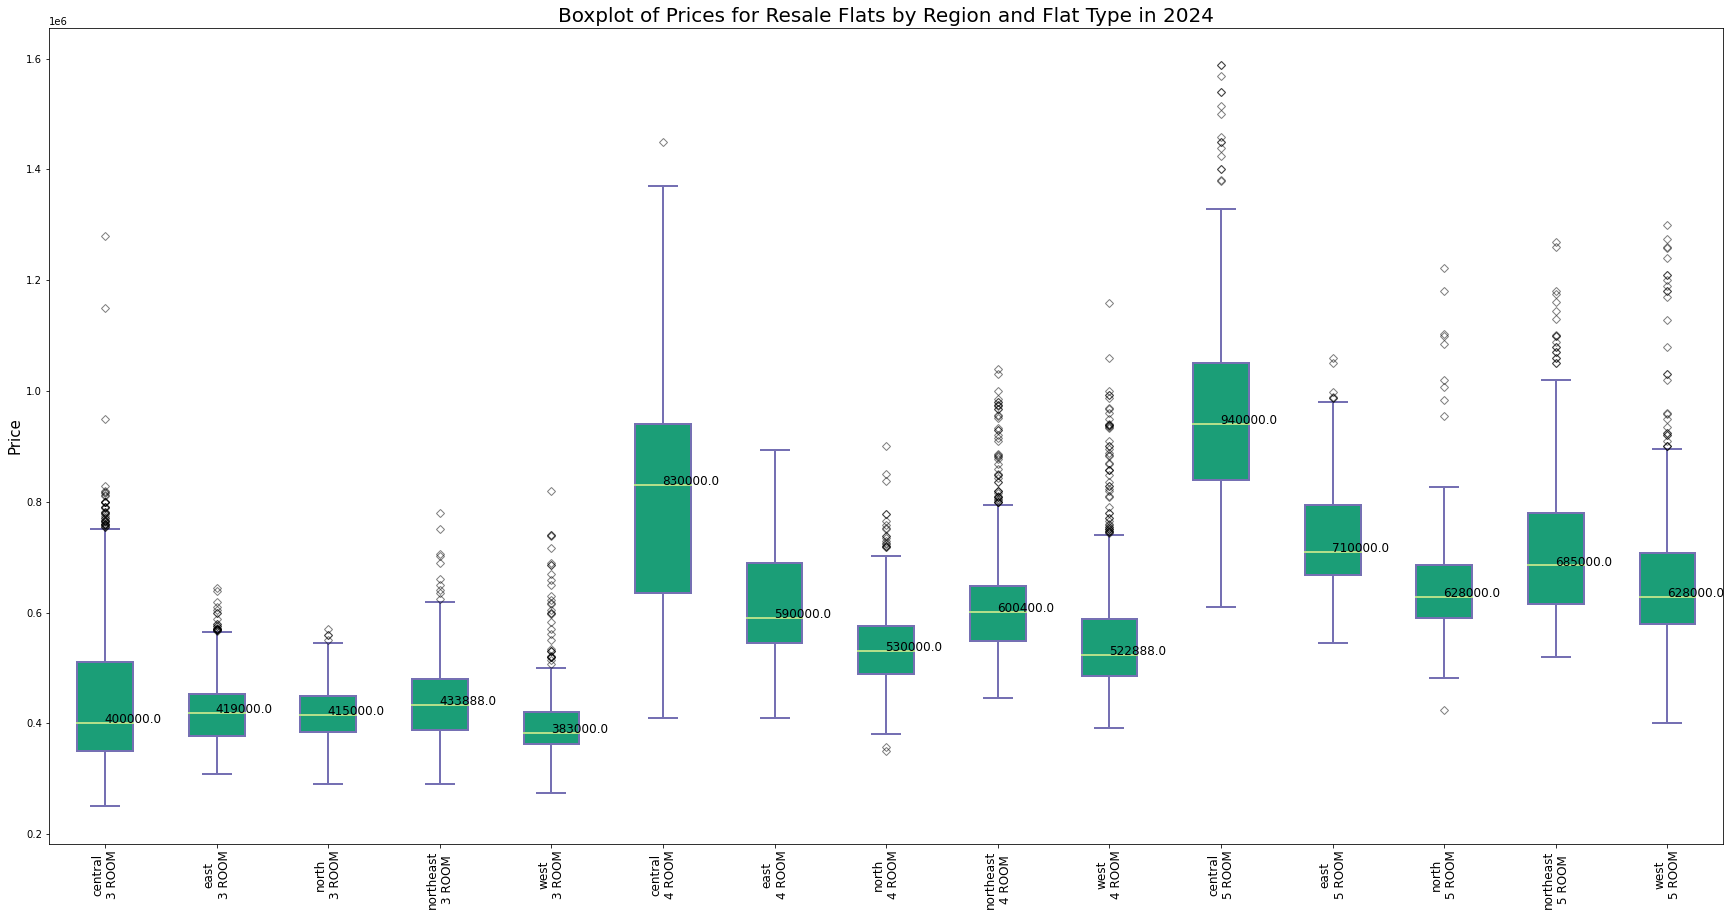

In [56]:
# Filter the data for specific flat types
data_2024_final = data_2024_final[np.isin(data_2024_final['flat_type'], ['3 ROOM', '4 ROOM', '5 ROOM'])]

# Get unique regions and flat types
regions = np.unique(data_2024_final['region'])
flat_types = np.unique(data_2024_final['flat_type'])

# Prepare data for box plot
values_combined = []
labels_combined = []

for flat_type in flat_types:
    for region in regions:
        region_flat_type_prices = data_2024_final[
            (data_2024_final['region'] == region) & (data_2024_final['flat_type'] == flat_type)
        ]['price']
        if len(region_flat_type_prices) > 0:  # Only add if there are prices available
            values_combined.append(region_flat_type_prices)
            labels_combined.append(f'{region}\n{flat_type}')

# Check the lengths of values_combined and labels_combined
print(f'Number of labels: {len(labels_combined)}')
print(f'Number of value sets: {len(values_combined)}')

# Plotting
plt.figure(figsize=(30, 15))
plt.title('Boxplot of Prices for Resale Flats by Region and Flat Type in 2024', fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=90)

# Create box plot
bp_dict = plt.boxplot(values_combined, labels=labels_combined, patch_artist=True)

# Change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor='#1b9e77')

# Change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

# Change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

# Change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)
    
# Overlay median values on the plot
for line in bp_dict['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y, '%.1f' % y, horizontalalignment='center', fontsize=12)

plt.show()

### Get the data for the respective planning regions of Singapore and 3 flat types

In [18]:
# Filter data for central
ce_m = (data['region'] == 'central')
ce = data[ce_m]
ce

# Filter data for north
n_m = (data['region'] == 'north')
n = data[n_m]
n

# Filter data for west
w_m = (data['region'] == 'west')
w = data[w_m]
w

# Filter data for northeast
ne_m = (data['region'] == 'northeast')
ne = data[ne_m]
ne

# Filter data for east
e_m = (data['region'] == 'east')
e = data[e_m]
e

array([(2017, 'BEDOK', '2 ROOM', '101', 'BEDOK NTH AVE 4', '04 TO 06',  45., 'Improved', 1978, '60 years 06 months', 238000., 'east'),
       (2017, 'BEDOK', '3 ROOM', '548', 'BEDOK NTH AVE 1', '04 TO 06',  68., 'New Generation', 1980, '62 years 06 months', 272000., 'east'),
       (2017, 'BEDOK', '3 ROOM', '75', 'BEDOK NTH RD', '07 TO 09',  59., 'Improved', 1978, '60 years', 278000., 'east'),
       ...,
       (2024, 'TAMPINES', 'EXECUTIVE', '495F', 'TAMPINES ST 43', '04 TO 06', 147., 'Apartment', 1994, '68 years 08 months', 850000., 'east'),
       (2024, 'TAMPINES', 'EXECUTIVE', '739', 'TAMPINES ST 72', '01 TO 03', 140., 'Apartment', 1997, '72 years 04 months', 833000., 'east'),
       (2024, 'TAMPINES', 'EXECUTIVE', '896A', 'TAMPINES ST 81', '07 TO 09', 149., 'Maisonette', 1988, '63 years 05 months', 968000., 'east')],
      dtype=[('year', '<i4'), ('town', '<U50'), ('flat_type', '<U10'), ('block', '<U10'), ('street_name', '<U50'), ('floor', '<U50'), ('area', '<f8'), ('model', '<U

### Basic stats North

In [20]:
# Filter data for north 3 room
n_3rm = (n['flat_type'] == '3 ROOM')
n_3 = n[n_3rm]

# Filter data for north 4 room
n_4rm = (n['flat_type'] == '4 ROOM')
n_4 = n[n_4rm]

# Filter data for north 5 room
n_5rm = (n['flat_type'] == '5 ROOM')
n_5 = n[n_5rm]

max_value = np.max(n['price'])
min_value = np.min(n['price'] )           
max_row_index = np.argmax(n['price'])
min_row_index = np.argmin(n['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n[max_row_index][0],n[max_row_index][10],n[max_row_index][2],n[max_row_index][11],n[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n[min_row_index][0],n[min_row_index][10],n[min_row_index][2],n[min_row_index][11],n[min_row_index][1]))


max_value = np.max(n_3['price'])
min_value = np.min(n_3['price'] )           
max_row_index = np.argmax(n_3['price'])
min_row_index = np.argmin(n_3['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n_3[max_row_index][0],n_3[max_row_index][10],n_3[max_row_index][2],n_3[max_row_index][11],n_3[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n_3[min_row_index][0],n_3[min_row_index][10],n_3[min_row_index][2],n_3[min_row_index][11],n_3[min_row_index][1]))

max_value = np.max(n_4['price'])
min_value = np.min(n_4['price'] )           
max_row_index = np.argmax(n_4['price'])
min_row_index = np.argmin(n_4['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n_4[max_row_index][0],n_4[max_row_index][10],n_4[max_row_index][2],n_4[max_row_index][11],n_4[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n_4[min_row_index][0],n_4[min_row_index][10],n_4[min_row_index][2],n_4[min_row_index][11],n_4[min_row_index][1]))

max_value = np.max(n_5['price'])
min_value = np.min(n_5['price'] )           
max_row_index = np.argmax(n_5['price'])
min_row_index = np.argmin(n_5['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n_5[max_row_index][0],n_5[max_row_index][10],n_5[max_row_index][2],n_5[max_row_index][11],n_5[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(n_5[min_row_index][0],n_5[min_row_index][10],n_5[min_row_index][2],n_5[min_row_index][11],n_5[min_row_index][1]))

The maximum price in the year 2024 at $ 1410000.0 for type EXECUTIVE in north region, BUKIT TIMAH town. 
The minimum price in the year 2023 at $ 150000.0 for type 2 ROOM in north region, WOODLANDS town. 
The maximum price in the year 2023 at $ 570000.0 for type 3 ROOM in north region, BUKIT TIMAH town. 
The minimum price in the year 2019 at $ 178000.0 for type 3 ROOM in north region, WOODLANDS town. 
The maximum price in the year 2024 at $ 900000.0 for type 4 ROOM in north region, BUKIT TIMAH town. 
The minimum price in the year 2020 at $ 218000.0 for type 4 ROOM in north region, WOODLANDS town. 
The maximum price in the year 2024 at $ 1222800.0 for type 5 ROOM in north region, BUKIT TIMAH town. 
The minimum price in the year 2019 at $ 270000.0 for type 5 ROOM in north region, WOODLANDS town. 


### Basic stats Central

In [21]:
# Filter data for central 3 room
ce_3rm = (ce['flat_type'] == '3 ROOM')
ce_3 = ce[ce_3rm]

# Filter data for central 4 room
ce_4rm = (ce['flat_type'] == '4 ROOM')
ce_4 = ce[ce_4rm]

# Filter data for central 5 room
ce_5rm = (ce['flat_type'] == '5 ROOM')
ce_5 = ce[ce_5rm]

max_value = np.max(ce['price'])
min_value = np.min(ce['price'] )           
max_row_index = np.argmax(ce['price'])
min_row_index = np.argmin(ce['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce[max_row_index][0],ce[max_row_index][10],ce[max_row_index][2],ce[max_row_index][11],ce[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce[min_row_index][0],ce[min_row_index][10],ce[min_row_index][2],ce[min_row_index][11],ce[min_row_index][1]))


max_value = np.max(ce_3['price'])
min_value = np.min(ce_3['price'] )           
max_row_index = np.argmax(ce_3['price'])
min_row_index = np.argmin(ce_3['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce_3[max_row_index][0],ce_3[max_row_index][10],ce_3[max_row_index][2],ce_3[max_row_index][11],ce_3[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce_3[min_row_index][0],ce_3[min_row_index][10],ce_3[min_row_index][2],ce_3[min_row_index][11],ce_3[min_row_index][1]))

max_value = np.max(ce_4['price'])
min_value = np.min(ce_4['price'] )           
max_row_index = np.argmax(ce_4['price'])
min_row_index = np.argmin(ce_4['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce_4[max_row_index][0],ce_4[max_row_index][10],ce_4[max_row_index][2],ce_4[max_row_index][11],ce_4[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce_4[min_row_index][0],ce_4[min_row_index][10],ce_4[min_row_index][2],ce_4[min_row_index][11],ce_4[min_row_index][1]))

max_value = np.max(ce_5['price'])
min_value = np.min(ce_5['price'] )           
max_row_index = np.argmax(ce_5['price'])
min_row_index = np.argmin(ce_5['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce_5[max_row_index][0],ce_5[max_row_index][10],ce_5[max_row_index][2],ce_5[max_row_index][11],ce_5[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ce_5[min_row_index][0],ce_5[min_row_index][10],ce_5[min_row_index][2],ce_5[min_row_index][11],ce_5[min_row_index][1]))

The maximum price in the year 2024 at $ 1588000.0 for type 5 ROOM in central region, BUKIT MERAH town. 
The minimum price in the year 2020 at $ 140000.0 for type 3 ROOM in central region, TOA PAYOH town. 
The maximum price in the year 2024 at $ 1280000.0 for type 3 ROOM in central region, KALLANG/WHAMPOA town. 
The minimum price in the year 2020 at $ 140000.0 for type 3 ROOM in central region, TOA PAYOH town. 
The maximum price in the year 2023 at $ 1500000.0 for type 4 ROOM in central region, BUKIT MERAH town. 
The minimum price in the year 2019 at $ 275000.0 for type 4 ROOM in central region, TOA PAYOH town. 
The maximum price in the year 2024 at $ 1588000.0 for type 5 ROOM in central region, BUKIT MERAH town. 
The minimum price in the year 2020 at $ 420000.0 for type 5 ROOM in central region, GEYLANG town. 


### Basic stats Northeast

In [22]:
# Filter data for northeast 3 room
ne_3rm = (ne['flat_type'] == '3 ROOM')
ne_3 = ne[ne_3rm]

# Filter data for northeast 4 room
ne_4rm = (ne['flat_type'] == '4 ROOM')
ne_4 = ne[ne_4rm]

# Filter data for northeast 5 room
ne_5rm = (ne['flat_type'] == '5 ROOM')
ne_5 = ne[ne_5rm]

max_value = np.max(ne['price'])
min_value = np.min(ne['price'] )           
max_row_index = np.argmax(ne['price'])
min_row_index = np.argmin(ne['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne[max_row_index][0],ne[max_row_index][10],ne[max_row_index][2],ne[max_row_index][11],ne[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne[min_row_index][0],ne[min_row_index][10],ne[min_row_index][2],ne[min_row_index][11],ne[min_row_index][1]))


max_value = np.max(ne_3['price'])
min_value = np.min(ne_3['price'] )           
max_row_index = np.argmax(ne_3['price'])
min_row_index = np.argmin(ne_3['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne_3[max_row_index][0],ne_3[max_row_index][10],ne_3[max_row_index][2],ne_3[max_row_index][11],ne_3[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne_3[min_row_index][0],ne_3[min_row_index][10],ne_3[min_row_index][2],ne_3[min_row_index][11],ne_3[min_row_index][1]))

max_value = np.max(ne_4['price'])
min_value = np.min(ne_4['price'] )           
max_row_index = np.argmax(ne_4['price'])
min_row_index = np.argmin(ne_4['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne_4[max_row_index][0],ne_4[max_row_index][10],ne_4[max_row_index][2],ne_4[max_row_index][11],ne_4[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne_4[min_row_index][0],ne_4[min_row_index][10],ne_4[min_row_index][2],ne_4[min_row_index][11],ne_4[min_row_index][1]))

max_value = np.max(ne_5['price'])
min_value = np.min(ne_5['price'] )           
max_row_index = np.argmax(ne_5['price'])
min_row_index = np.argmin(ne_5['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne_5[max_row_index][0],ne_5[max_row_index][10],ne_5[max_row_index][2],ne_5[max_row_index][11],ne_5[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(ne_5[min_row_index][0],ne_5[min_row_index][10],ne_5[min_row_index][2],ne_5[min_row_index][11],ne_5[min_row_index][1]))

The maximum price in the year 2024 at $ 1268000.0 for type 5 ROOM in northeast region, ANG MO KIO town. 
The minimum price in the year 2018 at $ 170000.0 for type 3 ROOM in northeast region, SERANGOON town. 
The maximum price in the year 2024 at $ 780000.0 for type 3 ROOM in northeast region, ANG MO KIO town. 
The minimum price in the year 2018 at $ 170000.0 for type 3 ROOM in northeast region, SERANGOON town. 
The maximum price in the year 2024 at $ 1038888.0 for type 4 ROOM in northeast region, ANG MO KIO town. 
The minimum price in the year 2018 at $ 271000.0 for type 4 ROOM in northeast region, SENGKANG town. 
The maximum price in the year 2024 at $ 1268000.0 for type 5 ROOM in northeast region, ANG MO KIO town. 
The minimum price in the year 2019 at $ 345000.0 for type 5 ROOM in northeast region, SENGKANG town. 


### Basic stats West

In [23]:
# Filter data for West 3 room
w_3rm = (w['flat_type'] == '3 ROOM')
w_3 = w[w_3rm]

# Filter data for West 4 room
w_4rm = (w['flat_type'] == '4 ROOM')
w_4 = w[w_4rm]

# Filter data for West 5 room
w_5rm = (w['flat_type'] == '5 ROOM')
w_5 = w[w_5rm]

max_value = np.max(w['price'])
min_value = np.min(w['price'] )           
max_row_index = np.argmax(w['price'])
min_row_index = np.argmin(w['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w[max_row_index][0],w[max_row_index][10],w[max_row_index][2],w[max_row_index][11],w[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w[min_row_index][0],w[min_row_index][10],w[min_row_index][2],w[min_row_index][11],w[min_row_index][1]))


max_value = np.max(w_3['price'])
min_value = np.min(w_3['price'] )           
max_row_index = np.argmax(w_3['price'])
min_row_index = np.argmin(w_3['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w_3[max_row_index][0],w_3[max_row_index][10],w_3[max_row_index][2],w_3[max_row_index][11],w_3[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w_3[min_row_index][0],w_3[min_row_index][10],w_3[min_row_index][2],w_3[min_row_index][11],w_3[min_row_index][1]))

max_value = np.max(w_4['price'])
min_value = np.min(w_4['price'] )           
max_row_index = np.argmax(w_4['price'])
min_row_index = np.argmin(w_4['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w_4[max_row_index][0],w_4[max_row_index][10],w_4[max_row_index][2],w_4[max_row_index][11],w_4[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w_4[min_row_index][0],w_4[min_row_index][10],w_4[min_row_index][2],w_4[min_row_index][11],w_4[min_row_index][1]))

max_value = np.max(w_5['price'])
min_value = np.min(w_5['price'] )           
max_row_index = np.argmax(w_5['price'])
min_row_index = np.argmin(w_5['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w_5[max_row_index][0],w_5[max_row_index][10],w_5[max_row_index][2],w_5[max_row_index][11],w_5[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(w_5[min_row_index][0],w_5[min_row_index][10],w_5[min_row_index][2],w_5[min_row_index][11],w_5[min_row_index][1]))

The maximum price in the year 2024 at $ 1300000.0 for type 5 ROOM in west region, CLEMENTI town. 
The minimum price in the year 2018 at $ 175000.0 for type 2 ROOM in west region, JURONG WEST town. 
The maximum price in the year 2024 at $ 820000.0 for type 3 ROOM in west region, CLEMENTI town. 
The minimum price in the year 2018 at $ 175000.0 for type 3 ROOM in west region, JURONG WEST town. 
The maximum price in the year 2024 at $ 1158000.0 for type 4 ROOM in west region, CLEMENTI town. 
The minimum price in the year 2019 at $ 235000.0 for type 4 ROOM in west region, BUKIT PANJANG town. 
The maximum price in the year 2024 at $ 1300000.0 for type 5 ROOM in west region, CLEMENTI town. 
The minimum price in the year 2020 at $ 300000.0 for type 5 ROOM in west region, JURONG EAST town. 


### Basic stats East

In [24]:
# Filter data for East 3 room
e_3rm = (e['flat_type'] == '3 ROOM')
e_3 = e[e_3rm]

# Filter data for East 4 room
e_4rm = (e['flat_type'] == '4 ROOM')
e_4 = e[e_4rm]

# Filter data for East 5 room
e_5rm = (e['flat_type'] == '5 ROOM')
e_5 = e[e_5rm]

max_value = np.max(e['price'])
min_value = np.min(e['price'] )           
max_row_index = np.argmax(e['price'])
min_row_index = np.argmin(e['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e[max_row_index][0],e[max_row_index][10],e[max_row_index][2],e[max_row_index][11],e[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e[min_row_index][0],e[min_row_index][10],e[min_row_index][2],e[min_row_index][11],e[min_row_index][1]))


max_value = np.max(e_3['price'])
min_value = np.min(e_3['price'] )           
max_row_index = np.argmax(e_3['price'])
min_row_index = np.argmin(e_3['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e_3[max_row_index][0],e_3[max_row_index][10],e_3[max_row_index][2],e_3[max_row_index][11],e_3[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e_3[min_row_index][0],e_3[min_row_index][10],e_3[min_row_index][2],e_3[min_row_index][11],e_3[min_row_index][1]))

max_value = np.max(e_4['price'])
min_value = np.min(e_4['price'] )           
max_row_index = np.argmax(e_4['price'])
min_row_index = np.argmin(e_4['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e_4[max_row_index][0],e_4[max_row_index][10],e_4[max_row_index][2],e_4[max_row_index][11],e_4[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e_4[min_row_index][0],e_4[min_row_index][10],e_4[min_row_index][2],e_4[min_row_index][11],e_4[min_row_index][1]))

max_value = np.max(e_5['price'])
min_value = np.min(e_5['price'] )           
max_row_index = np.argmax(ce_5['price'])
min_row_index = np.argmin(ce_5['price'])
print("The maximum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e_5[max_row_index][0],e_5[max_row_index][10],e_5[max_row_index][2],e_5[max_row_index][11],e_5[max_row_index][1]))
print("The minimum price in the year {} at $ {} for type {} in {} region, {} town. ".format(e_5[min_row_index][0],e_5[min_row_index][10],e_5[min_row_index][2],e_5[min_row_index][11],e_5[min_row_index][1]))

The maximum price in the year 2022 at $ 1238000.0 for type EXECUTIVE in east region, PASIR RIS town. 
The minimum price in the year 2023 at $ 150000.0 for type 3 ROOM in east region, TAMPINES town. 
The maximum price in the year 2024 at $ 643500.0 for type 3 ROOM in east region, PASIR RIS town. 
The minimum price in the year 2023 at $ 150000.0 for type 3 ROOM in east region, TAMPINES town. 
The maximum price in the year 2024 at $ 893000.0 for type 4 ROOM in east region, BEDOK town. 
The minimum price in the year 2020 at $ 250000.0 for type 4 ROOM in east region, TAMPINES town. 
The maximum price in the year 2023 at $ 888000.0 for type 5 ROOM in east region, BEDOK town. 
The minimum price in the year 2020 at $ 725000.0 for type 5 ROOM in east region, TAMPINES town. 


### Scatter Plot of the data

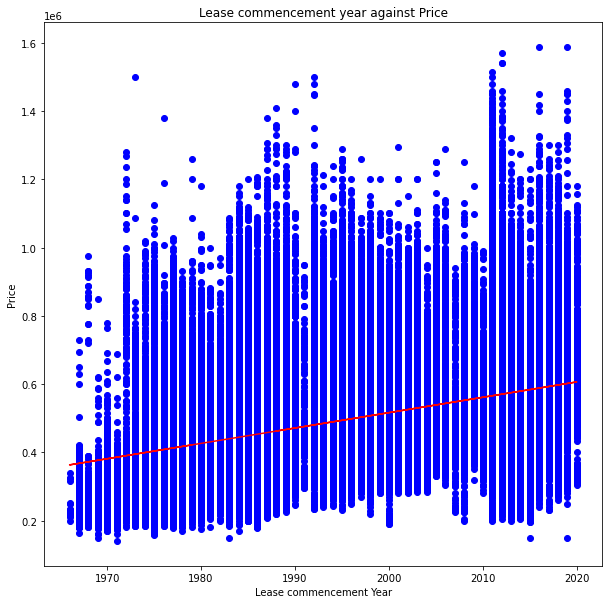

Pearson correlation coefficient: 0.36572252352772006


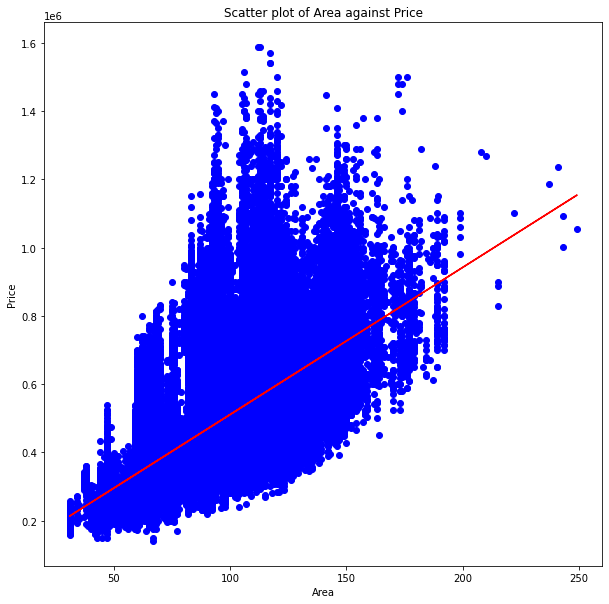

Pearson correlation coefficient: 0.5990964078495068


In [25]:
#Scatterplot
xdata = data['lc_year']
ydata = data['price']
m,b = np.polyfit(xdata, ydata, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xdata,ydata,c=['blue'])
plt.plot(xdata, m*xdata + b, 'r-')
plt.title("Lease commencement year against Price")
plt.xlabel('Lease commencement Year')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(data['lc_year'], data['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

#Scatterplot
xdata = data['area']
ydata = data['price']
m,b = np.polyfit(xdata, ydata, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xdata,ydata,c=['blue'])
plt.plot(xdata, m*xdata + b, 'r-')
plt.title("Scatter plot of Area against Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(data['area'], data['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

### Scatter plot North

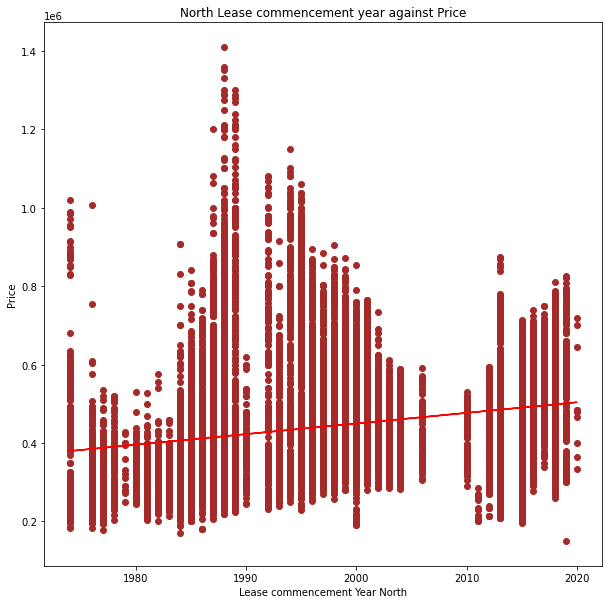

Pearson correlation coefficient: 0.2394771358365675


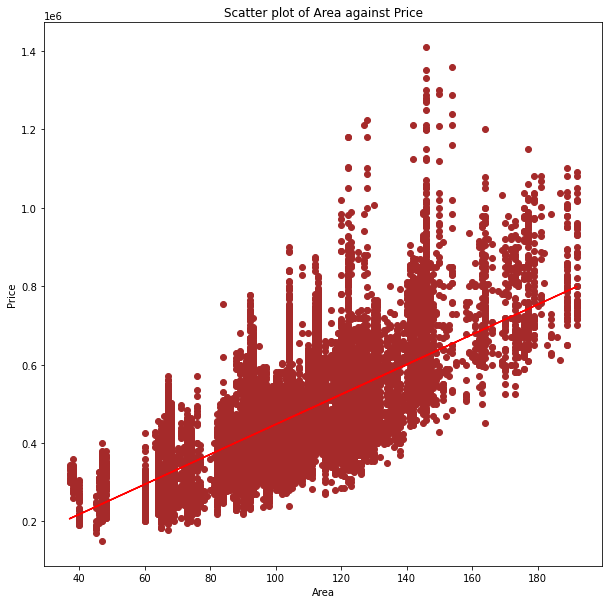

Pearson correlation coefficient: 0.6808525620791721


In [26]:
#Scatterplots ne
xn = n['lc_year']
yn = n['price']
m,b = np.polyfit(xn, yn, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xn,yn,c=['brown'])
plt.plot(xn, m*xn + b, 'r-')
plt.title("North Lease commencement year against Price")
plt.xlabel('Lease commencement Year North')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(n['lc_year'], n['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


xn = n['area']
yn = n['price']
m,b = np.polyfit(xn, yn, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xn,yn,c=['brown'])
plt.plot(xn, m*xn + b, 'r-')
plt.title("Scatter plot of Area against Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(n['area'], n['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

### Scatter plot central 

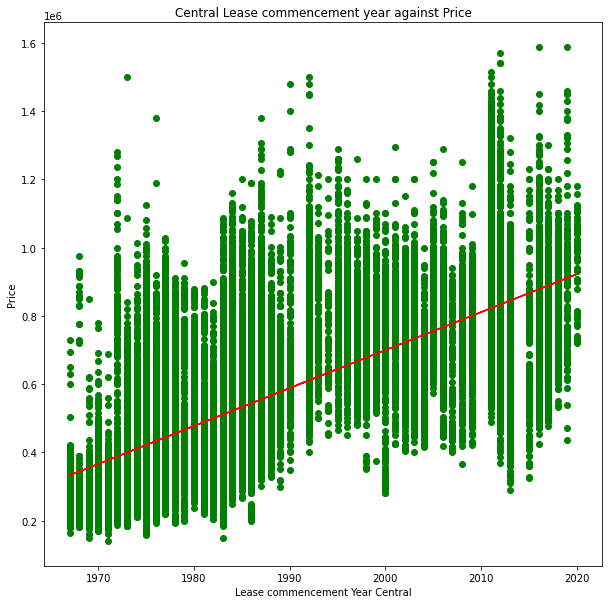

Pearson correlation coefficient: 0.7307047606373708


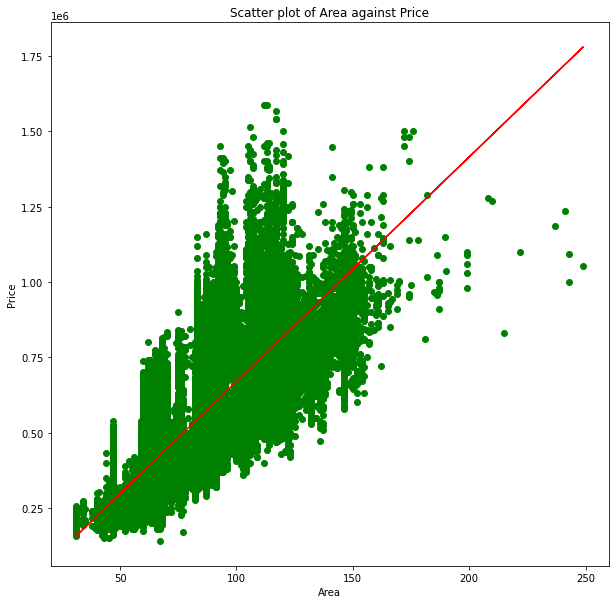

Pearson correlation coefficient: 0.746590542785461


In [27]:
#Scatterplots central
xce = ce['lc_year']
yce = ce['price']
m,b = np.polyfit(xce, yce, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xce,yce,c=['green'])
plt.plot(xce, m*xce + b, 'r-')
plt.title("Central Lease commencement year against Price")
plt.xlabel('Lease commencement Year Central')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(ce['lc_year'], ce['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


xce = ce['area']
yce = ce['price']
m,b = np.polyfit(xce, yce, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xce,yce,c=['green'])
plt.plot(xce, m*xce + b, 'r-')
plt.title("Scatter plot of Area against Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(ce['area'], ce['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

### Scatter Plot Northeast

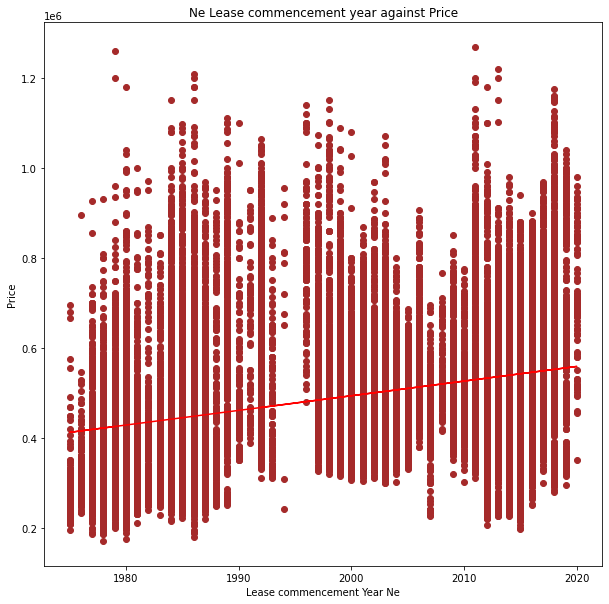

Pearson correlation coefficient: 0.30572641981047444


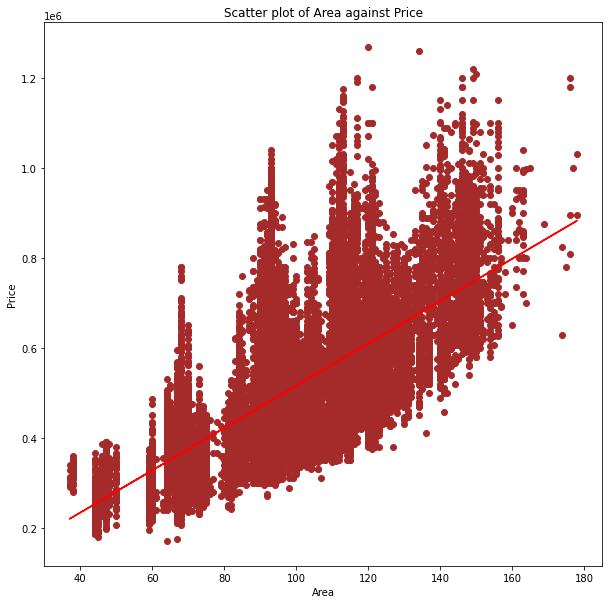

Pearson correlation coefficient: 0.6732939700504


In [28]:
#Scatterplots ne
xne = ne['lc_year']
yne = ne['price']
m,b = np.polyfit(xne, yne, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xne,yne,c=['brown'])
plt.plot(xne, m*xne + b, 'r-')
plt.title("Ne Lease commencement year against Price")
plt.xlabel('Lease commencement Year Ne')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(ne['lc_year'], ne['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


xne = ne['area']
yne = ne['price']
m,b = np.polyfit(xne, yne, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xne,yne,c=['brown'])
plt.plot(xne, m*xne + b, 'r-')
plt.title("Scatter plot of Area against Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(ne['area'], ne['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")

### Scatter plot West

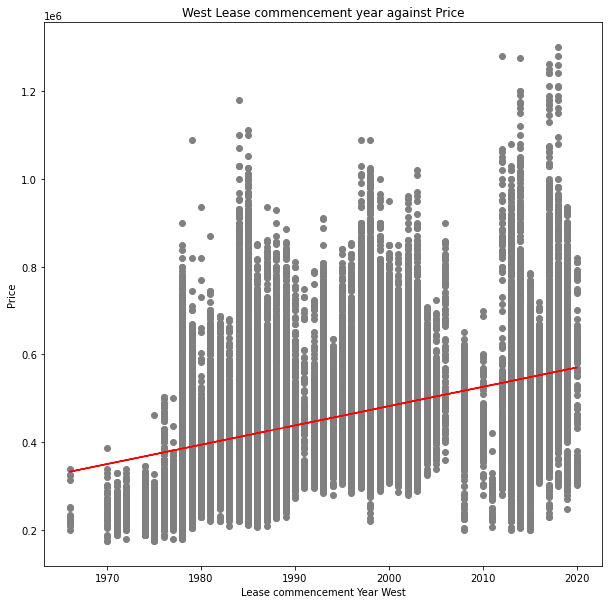

Pearson correlation coefficient: 0.37682508637077144


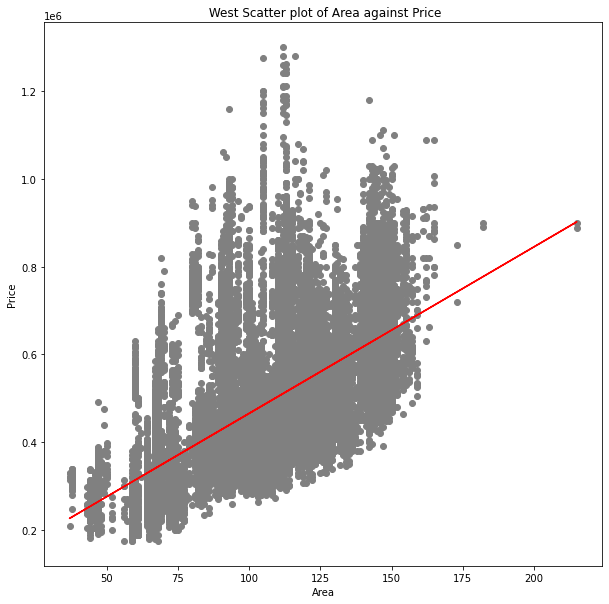

Pearson correlation coefficient: 0.6139953998403409


In [29]:
#Scatterplots West
xw = w['lc_year']
yw = w['price']
m,b = np.polyfit(xw, yw, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xw,yw,c=['grey'])
plt.plot(xw, m*xw + b, 'r-')
plt.title("West Lease commencement year against Price")
plt.xlabel('Lease commencement Year West')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(w['lc_year'], w['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


xw = w['area']
yw = w['price']
m,b = np.polyfit(xw, yw, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xw,yw,c=['grey'])
plt.plot(xw, m*xw + b, 'r-')
plt.title(" West Scatter plot of Area against Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(w['area'], w['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


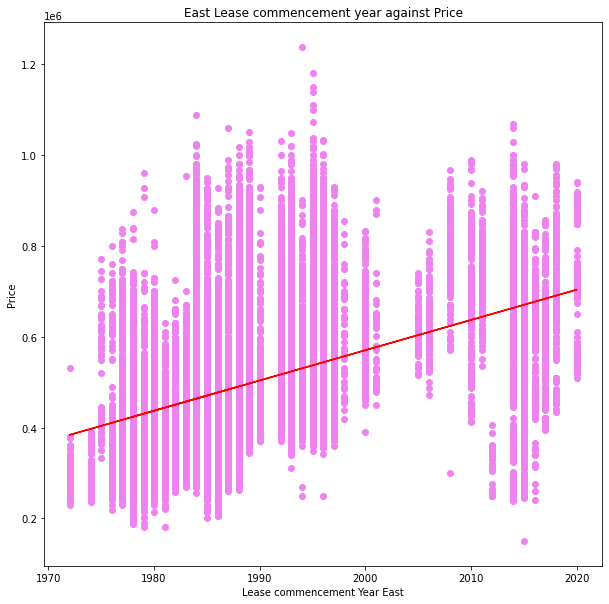

Pearson correlation coefficient: 0.46834967296334207


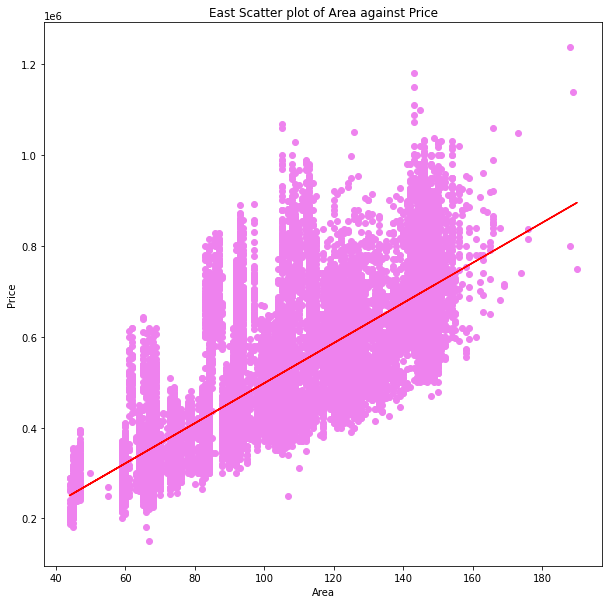

Pearson correlation coefficient: 0.7426865170314899


In [30]:
#Scatterplots east
xe = e['lc_year']
ye = e['price']
m,b = np.polyfit(xe, ye, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xe,ye,c=['violet'])
plt.plot(xe, m*xe + b, 'r-')
plt.title("East Lease commencement year against Price")
plt.xlabel('Lease commencement Year East')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(e['lc_year'], e['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")


xe = e['area']
ye = e['price']
m,b = np.polyfit(xe, ye, deg=1)

plt.figure(figsize=(10,10))
plt.scatter(xe,ye,c=['violet'])
plt.plot(xe, m*xe + b, 'r-')
plt.title("East Scatter plot of Area against Price")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

pearson_corr = np.corrcoef(e['area'], e['price'])[0, 1]
print(f"Pearson correlation coefficient: {pearson_corr}")